# Group information

Names:


RAs:

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Spotify Song Attributes**

The Spotify Song Attributes Dataset is a comprehensive collection of music tracks, encompassing various genres and artist names. This dataset provides valuable insights into the world of music, allowing enthusiasts, researchers, and data scientists to delve into the characteristics and nuances of each track.

The dataset can be found here: https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes


Some features and the corresponding descriptions:

| Variable Name | Data Type | Description | Example Value | Range/Possible Values |
|---|---|---|---|---|
| `track_name` | String | Name of the song | `'Blinding Lights'` | - |
| `track_artist` | String | Name of the artist(s) | `'The Weeknd'` | - |
| `msPlayed` | Integer | Miniseconds Played | `191772` | - |
| `danceability` | Float | How suitable a track is for dancing (0.0 - 1.0) | `0.70` | 0.0 - 1.0 |
| `energy` | Float | Perceptual measure of intensity and activity (0.0 - 1.0) | `0.73` | 0.0 - 1.0 |
| `key` | Integer | Estimated overall key of the track (0 = C, 1 = C♯/D♭, ... , 11 = B) | `1` | 0 - 11 |
| `loudness` | Float | Overall loudness of the track in decibels (dB) | `-5.934` | Typically -60 to 0 dB |
| `mode` | Integer | Modality of the track (0 = Minor, 1 = Major) | `1` | 0 or 1 |
| `speechiness` | Float | Presence of spoken words in the track (0.0 - 1.0) | `0.0572` | 0.0 - 1.0 |
| `acousticness` | Float | Confidence measure of whether the track is acoustic (0.0 - 1.0) | `0.00146` | 0.0 - 1.0 |
| `instrumentalness` | Float | Predicts whether a track contains no vocals (0.0 - 1.0) | `0.000095` | 0.0 - 1.0 |
| `liveness` | Float | Presence of an audience in the recording (0.0 - 1.0) | `0.0897` | 0.0 - 1.0 |
| `valence` | Float | Musical positiveness conveyed by a track (0.0 - 1.0) | `0.644` | 0.0 - 1.0 |
| `tempo` | Float | Overall estimated tempo of a track in beats per minute (BPM) | `171.005` | Typically 50 - 200 BPM |
| `duration_ms` | Integer | Duration of the track in milliseconds | `191948` | - |
| `time_signature` | Integer | Estimated overall time signature of a track | `4` | Typically 3, 4, or 5 |
| `genre` | String | Genre of the track (if available) | `'Pop'` | Varies depending on dataset |


In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
# Change this to be the correct path if you added the dataset in a different location
path = '/content/drive/u/0/my-drive/dataset.csv'

df = pd.read_csv(path)

#eu coloco qual path?

df.head()

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`msPlayed`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it (more details on the `mutual_information` section below!).

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


Mounted at /content/gdrive


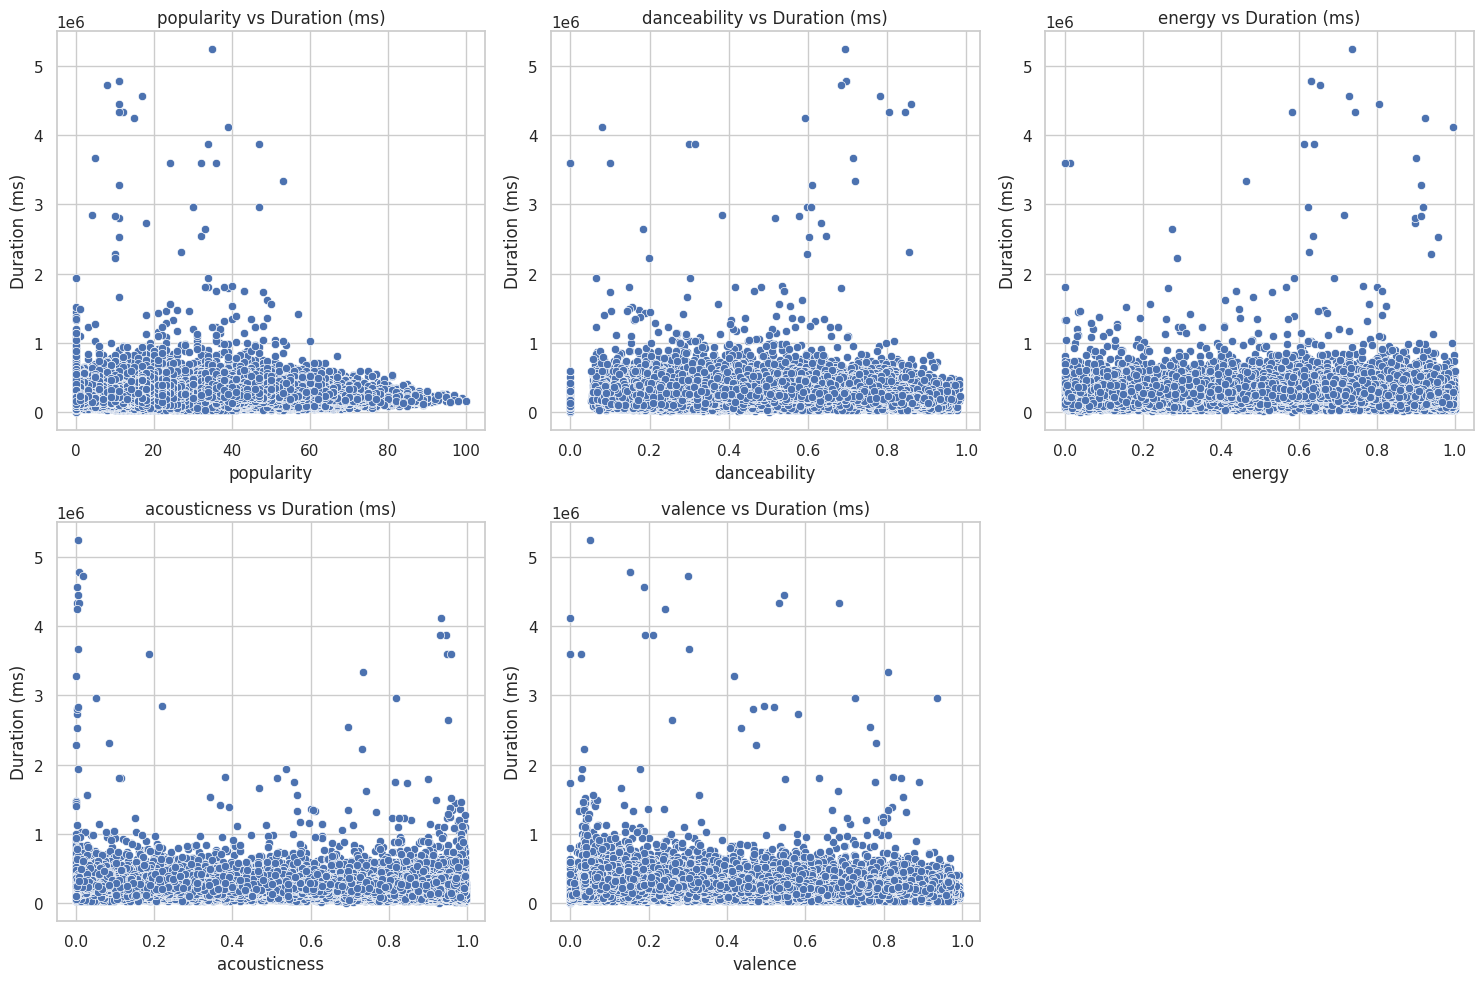

In [ ]:
## Visualize the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
# Change this to be the correct path if you added the dataset in a different location
path = '/content/gdrive/MyDrive/dataset.csv'

df = pd.read_csv(path)

df.head()


# Definir o estilo de gráfico do seaborn
sns.set(style="whitegrid")

# Criar uma lista com as variáveis a serem comparadas
variables_to_plot = ['popularity', 'danceability', 'energy', 'acousticness', 'valence']

# Criar uma matriz de subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gerar gráficos de dispersão para cada variável em relação a 'duration_ms'
for i, var in enumerate(variables_to_plot):
    row, col = divmod(i, 3)  # Para organizar os gráficos em linhas e colunas
    sns.scatterplot(x=df[var], y=df['duration_ms'], ax=axes[row, col])  # Plotar os gráficos
    axes[row, col].set_title(f'{var} vs Duration (ms)')  # Título de cada gráfico
    axes[row, col].set_xlabel(var)  # Rótulo no eixo X
    axes[row, col].set_ylabel('Duration (ms)')  # Rótulo no eixo Y

# Remover gráfico vazio se houver (no caso de 5 gráficos, em uma grade 2x3)
fig.delaxes(axes[1, 2])

# Ajustar a disposição dos gráficos
plt.tight_layout()

# Mostrar os gráficos
plt.show()

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [ ]:
## check Mutal information
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

# Carregando o dataset
dataset_path = '/content/gdrive/MyDrive/dataset.csv'
data = pd.read_csv(dataset_path)
data.head()

# Separar as features (X) e a variável alvo (y)
X = data.drop('popularity', axis=1)
y = data['popularity']

# Verificar o tipo de cada coluna para identificar as variáveis categóricas e contínuas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Convertendo colunas categóricas em números usando OrdinalEncoder
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Handling NaN values by filling them with the mean for continuous features
# and the most frequent value for categorical features
for col in continuous_cols:
    X[col] = X[col].fillna(X[col].mean())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Criando o array para o parâmetro `discrete_features`
discrete_features = [False] * X.shape[1]
for col in categorical_cols:
    discrete_features[X.columns.get_loc(col)] = True  # Colunas categóricas são 'True'

# Calculando a Mutual Information
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)

# Criar um DataFrame para organizar e visualizar as informações
mi_results = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# Exibir os resultados
print(mi_results)

             Feature  Mutual Information
1           track_id            6.249747
4         track_name            3.636138
3         album_name            2.839811
2            artists            2.155096
0         Unnamed: 0            1.823704
19       track_genre            0.890714
5        duration_ms            0.447075
17             tempo            0.445478
10          loudness            0.386896
13      acousticness            0.299288
14  instrumentalness            0.251491
16           valence            0.196379
8             energy            0.189739
12       speechiness            0.178828
15          liveness            0.171508
7       danceability            0.160327
9                key            0.010064
6           explicit            0.006730
18    time_signature            0.004971
11              mode            0.000000


In [ ]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function
mt_info_df = pd.Series(mt_info)
mt_info_df.index = X.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

In [ ]:
## Adapt the categorical features

#### Discussion of key points

- How the visualization helped in understanding the data?
- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)



Os gráficos mostram a relação entre a duração das músicas (duration_ms) e as variáveis popularity, danceability, energy, acousticness e valence. Isso permite identificar se há alguma tendência ou correlação entre essas características e o tempo de duração das faixas.

A tabela resultante mostra as features ordenadas pela Mutual Information. Ao eliminar features com baixa dependência com o alvo, potencialmente melhorando o desempenho do modelo.

### **Implement and train a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` metric started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand regression model's perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of the last two metrics (MAE and R²) or use it from sklearn. Compare the three different metrics.

In [ ]:
# TODO: MSE. You cannot use machine learning libraries for this!!

import numpy as np
# Métrica MSE
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Métrica MAE (Mean Absolute Error)
def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Métrica R² (Coeficiente de Determinação)
def R2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)



In [ ]:
import numpy as np

# TODO: Finish the implementation of MyLinearRegressor. You cannot use machine learning libraries for this!!
class LinearRegressor():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None
    self.coef_ = None  # Coeficientes do modelo
    self.intercept_ = None  # Interceptação do modelo

  def predict(self, X):
    # Adiciona a coluna de 1's novamente para o termo de interceptação
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept_, self.coef_])

  def fit(self, X, y):
     # Adiciona uma coluna de 1's para o termo de interceptação
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calcula os parâmetros (Theta) pela equação normal
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Define interceptação e coeficientes
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]



#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of miliseconds played? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?



Para prever o número de milissegundos tocados, o MSE pode ser a métrica mais adequada, já que grandes desvios provavelmente são mais prejudiciais em um contexto de tempo, e o MSE penaliza fortemente grandes erros. Além disso, o R² pode ser um bom indicador para verificar se o modelo está explicando bem a variabilidade do tempo de reprodução.





Para avaliar a capacidade do LinearRegressor em prever com precisão o tempo tocado em milissegundos, podemos usar o R²:

Se o valor de R² estiver próximo de 1, significa que o modelo explica bem a variabilidade dos dados e, portanto, está estimando bem o tempo tocado.
Se o valor de R² for próximo de 0 ou negativo, o modelo está falhando em capturar a relação entre as variáveis preditoras e a variável alvo.
Se o R² for significativamente menor no  modelo em comparação com o SGDRegressor, isso sugere que o LinearRegressor tem dificuldade em modelar adequadamente a relação entre as features e o tempo tocado.




Como eu estou utilizando um Linear Regressor, que é um modelo relativamente simples, é mais provável que o modelo sofra de erro de bias. Isso significa que ele pode não estar capturando todas as relações complexas entre as features e o tempo tocado.

### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [ ]:
# TODO: Traing the SGDRegressor. You should use sklearn libraries.
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score as sklearn_r2_score

In [ ]:
import numpy as np
import pandas as pd

class LinearRegressor():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None
    self.coef_ = None  # Coeficientes do modelo
    self.intercept_ = None  # Interceptação do modelo

  def predict(self, X):
    # Adiciona a coluna de 1's novamente para o termo de interceptação
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept_, self.coef_])

  def fit(self, X, y):
     # Adiciona uma coluna de 1's para o termo de interceptação
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Calcula os parâmetros (Theta) pela equação normal
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Define interceptação e coeficientes
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Carregando o dataset
dataset_path = '/content/gdrive/MyDrive/dataset.csv'
data = pd.read_csv(dataset_path)
data.head()

# Separar as features (X) e a variável alvo (y)
X = data.drop('duration_ms', axis=1)
y = data['duration_ms']

# Treinando o MyLinearRegressor
regressor = LinearRegressor()
regressor.fit(X, y)
y_pred_manual = regressor.predict(X)

# Avaliando o desempenho
mse_manual = MSE(y, y_pred_manual)
mae_manual = MAE(y, y_pred_manual)
r2_manual = R2(y, y_pred_manual)

print("Desempenho do LinearRegressor:")
print("MSE:", mse_manual)
print("MAE:", mae_manual)
print("R²:", r2_manual)

# Escalando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinando o SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_regressor.fit(X_scaled, y)
y_pred_sgd = sgd_regressor.predict(X_scaled)

# Avaliando o desempenho do SGDRegressor
mse_sgd = mean_squared_error(y, y_pred_sgd)
mae_sgd = mean_absolute_error(y, y_pred_sgd)
r2_sgd = sklearn_r2_score(y, y_pred_sgd)

print("\nDesempenho do SGDRegressor:")
print("MSE:", mse_sgd)
print("MAE:", mae_sgd)
print("R²:", r2_sgd)






Mounted at /content/gdrive


### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



In [ ]:
# Reload the dataset
# Carregando o dataset
dataset_path = '/content/gdrive/MyDrive/dataset.csv'
data = pd.read_csv(dataset_path)
data.head()

In [ ]:
# Transform features
# Escolher algumas features para testar interações
feature_1 = 'feature_a'
feature_2 = 'feature_b'

# Criando novas colunas com interações
X['sum_interaction'] = X[feature_1] + X[feature_2]
X['sub_interaction'] = X[feature_1] - X[feature_2]
X['mul_interaction'] = X[feature_1] * X[feature_2]
X['div_interaction'] = X[feature_1] / (X[feature_2] + 1e-8)  # Evitar divisão por zero

In [ ]:
# Check mutual information
# Recalcular a Mutual Information para as novas colunas
mi_scores_new = mutual_info_regression(X, y, discrete_features=discrete_features)

# Atualizar o DataFrame com os resultados
mi_results_new = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores_new
}).sort_values(by='Mutual Information', ascending=False)

# Exibir os novos resultados
print(mi_results_new)

In [ ]:
# Re-train and test the model
# Treinar o modelo com as novas features
regressor = LinearRegressor()
regressor.fit(X, y)
y_pred_interaction = regressor.predict(X)

# Avaliar o desempenho do modelo com as novas interações
mse_interaction = MSE(y, y_pred_interaction)
mae_interaction = MAE(y, y_pred_interaction)
r2_interaction = R2(y, y_pred_interaction)

print("Desempenho com interações:")
print("MSE:", mse_interaction)
print("MAE:", mae_interaction)
print("R²:", r2_interaction)

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: Kickstarter Projects**

I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them… But I hope you can!


https://www.kaggle.com/datasets/kemical/kickstarter-projects


| Variable Name | Data Type | Description | Example Value |
|---|---|---|---|
| `ID` | Integer | Unique identifier for the project | `1000002330` |
| `name` | String | Name of the project | `"The Songs of Adelaide & Abullah"` |
| `category` | String | Category of the project (e.g., "Publishing", "Film & Video", "Music") | `"Publishing"` |
| `main_category` | String | Main category of the project (e.g., "Art", "Technology", "Games") | `"Art"` |
| `currency` | String | Currency used for the funding goal | `"GBP"` |
| `deadline` | Date | Date the project funding period ended | `"2015-10-09"` |
| `goal` | Float | Funding goal in the project's currency | `1000.0` |
| `launched` | Date | Date the project was launched | `"2015-08-11 12:12:28"` |
| `pledged` | Float | Total amount pledged in the project's currency | `0.0` |
| `state` | String | State of the project (e.g., "failed", "successful", "canceled") | `"failed"` |
| `backers` | Integer | Number of backers who pledged to the project | `0` |
| `country` | String | Country where the project is based | `"GB"` |
| `usd pledged` | Float | Total amount pledged in US dollars (converted) | `0.0` |
| `usd_pledged_real` | Float | Total amount pledged in US dollars (converted using a different API) | `0.0` |
| `usd_goal_real` | Float | Funding goal in US dollars (converted using a different API) | `1533.95` |

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive, remove comments if need to restart from this step.
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRF0_FSqwwH5nJ5XS0rzdfZI_RKxl0KGO-zRRF9uUe1Ec0q7SfRlvKhjCGJFIg6ht-dMowoGTjCrJF4/pub?gid=696060378&single=true&output=csv' # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path, sep=',', on_bad_lines='skip')

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


In [ ]:
# Convert all columns to numeric where possible, invalid parsing will result in NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Fill missing values for numeric columns with their mean
df.fillna(df.mean(), inplace=True)

# Verify the missing values
print(df.isnull().sum())


In [ ]:
# Check if 'state' column contains any missing values
print(f"Number of missing values in 'state': {df['state'].isnull().sum()}")

# Drop rows with missing 'state' values
df = df.dropna(subset=['state'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Drop the non-required columns and the target column ('state')
X = df.drop(columns=['name', 'deadline', 'launched', 'ID'], axis=1, errors='ignore')
y = df['state']

print("Shape of df:", df.shape)
print("Shape of X:", X.shape)

# Drop columns with no observed values
X = X.dropna(axis=1, how='all')

# Encode categorical features
enc = OrdinalEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = enc.fit_transform(X[col].to_numpy().reshape(-1, 1))
    
print("Shape of X after encoding:", X.shape)
print(X.head())

#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
-~Changing the missing values impacted in the mutual information of features with the target?~ => DO NOT ANSWER, there is no way to calculate Mutual Informations with missing values.

Yes, there were missing values and I dealt with them using approaches and filling the missing values with the mean of each column.

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder to handle encoding of target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on the training data
X_test = imputer.transform(X_test) # Transform the test data

# Initialize LabelEncoder
le = LabelEncoder()

# Ensure y_train and y_test are treated as categories
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Find common labels between train and test sets
common_labels = set(y_train) & set(y_test)

# Filter out rows with unseen labels
train_mask = y_train.isin(common_labels)
test_mask = y_test.isin(common_labels)
X_train, y_train = X_train[train_mask], y_train[train_mask]
X_test, y_test = X_test[test_mask], y_test[test_mask]

# Encode target variable 
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

*YOUR ANSWER HERE*

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Spotify Song Attributes**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of rate of played time w.r.t. the time of the song.<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum rate in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

*YOUR ANSWER HERE*